In [39]:
# Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

# Import dependency and set theme for visualizations
import seaborn as sns
color_theme = sns.set_palette("muted")
sns.set(rc={'axes.facecolor': 'gainsboro', 'figure.facecolor':'whitesmoke'})

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [40]:
# Store file path
csv_path="Output/Border_Crossing_Final_Data.csv"

# Read the csv file
population_df = pd.read_csv(csv_path).drop(columns="Index")

# Display the dataset
population_df

,Year,Month,Timestamp,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2018,12,1543622400,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
1,2018,12,1543622400,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2,2018,12,1543622400,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.34444
3,2018,12,1543622400,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
4,2018,12,1543622400,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61739,48.49988
...,...,...,...,...,...,...,...,...,...,...
144600,2009,1,1230768000,US-Canada Border,Sherwood,North Dakota,Train Passengers,0,-101.63000,49.00000
144601,2009,1,1230768000,US-Mexico Border,Progreso,Texas,Buses,7,-97.95000,26.06000
144602,2009,1,1230768000,US-Canada Border,Friday Harbor,Washington,Truck Containers Full,0,-123.01000,48.54000
144603,2009,1,1230768000,US-Canada Border,Port Huron,Michigan,Pedestrians,0,-82.42000,43.00000


In [65]:
# Generate random sample representing 10% of the population
sample_df = population_df.sample(frac =.10)
  
# Display the data
sample_df
  

,Year,Month,Timestamp,Border,Port Name,State,Measure,Value,Longitude,Latitude
24046,2016,7,1467331200,US-Canada Border,Del Bonita,Montana,Trucks,27,-112.79,49.00
129047,2009,12,1259625600,US-Canada Border,Norton,Vermont,Rail Containers Full,959,-71.79,45.01
93759,2012,3,1330560000,US-Mexico Border,Tecate,California,Trains,0,-116.63,32.58
130206,2009,11,1257033600,US-Mexico Border,Eagle Pass,Texas,Personal Vehicles,213539,-100.51,28.71
52352,2014,10,1412121600,US-Canada Border,Madawaska,Maine,Buses,5,-68.33,47.36
...,...,...,...,...,...,...,...,...,...,...
89880,2012,6,1338508800,US-Canada Border,Port Angeles,Washington,Truck Containers Empty,0,-123.43,48.12
50431,2014,11,1414800000,US-Canada Border,Dalton Cache,Alaska,Truck Containers Empty,113,-136.36,59.45
80721,2012,12,1354320000,US-Canada Border,Jackman,Maine,Truck Containers Empty,3114,-70.40,45.81
113141,2010,12,1291161600,US-Canada Border,Scobey,Montana,Personal Vehicle Passengers,748,-105.41,49.00


In [42]:
# Get the data for just Years and Values for statistical analysis
population_data = population_df[["Year", "Value"]]
sample_data = sample_df[["Year", "Value"]]

In [32]:
# Generate means for both population and sample data for statistical analysis
population = population_data.groupby("Year").mean()
sample = sample_data.groupby("Year").mean()

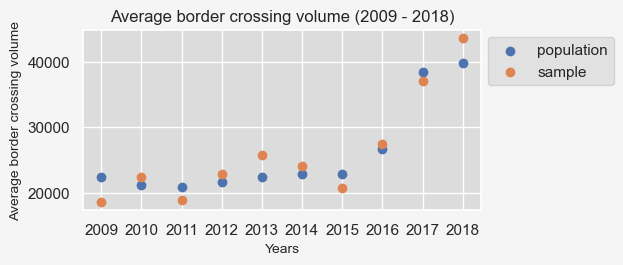

In [55]:
# Plot the data for population and sample

# Set the labels
labels = population_data["Year"].sort_values(ascending=True).unique()

# Plto the data
Fig38 = plt.subplot(2, 1, 1)
Fig38 = plt.scatter(population.index, population, label="population")
Fig38 = plt.scatter(sample.index, sample, label="sample")

# Set chart title and axis labels
plt.xlabel("Years", fontsize=10)
plt.ylabel("Average border crossing volume", fontsize=10)
plt.title("Average border crossing volume (2009 - 2018)", fontsize=12)

# Set xticks and layout
plt.xticks(np.arange(2009, 2019), labels=labels)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Save the figure (This was commented out after saving to avoid overwriting the image every time the Jupyter Notebook is run again)
# plt.savefig("Images/Fig38.png")

# Show the chart
plt.show()

In [44]:
# Conduct one sample t-test
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=Value    0.090206
dtype: float64, pvalue=Value    0.930099
dtype: float64)